<a href="https://colab.research.google.com/github/BerniceJewel/Computational-Finance-Programming/blob/main/RevisionQuestions_EULER_MILSTEIN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kde

In [69]:
#REVISION QUESTIONS
# Parameters for both SDEs
T = 1.0        # Total time
N = 1000       # Number of time steps
dt = T / N     # Time step size
alpha = 0.1    # Constant term in the drift for SDE (a)
r = 0.5        # Constant multiplier for SDE (b)
sigma = 0.2    # Volatility term for SDE (b)
X0 = 1.0       # Initial condition for X
r0 = 0.5       # Initial condition for r
mu=0.5
t = np.linspace(0, T, N+1)
#QUESTION 1
# (a) dXt = (mu * Xt + theta) * dt + Xt * dWt, with X0 = 1
def euler_scheme_sde_a(mu, theta, T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)
    Xt = np.zeros(N+1)
    Xt[0] = 1

    dWt = np.random.normal(0, np.sqrt(dt), N)
    for i in range(N):
        Xt[i+1] = Xt[i] + (mu * Xt[i] + theta) * dt + Xt[i] * dWt[i]

    return Xt

In [70]:
def milstein_scheme_sde_a(mu, theta, T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)
    Xt = np.zeros(N+1)
    Xt[0] = 1

    dWt = np.random.normal(0, np.sqrt(dt), N)
    for i in range(N):
        Xt[i+1] = Xt[i] + (mu * Xt[i] + theta) * dt + Xt[i] * dWt[i] + 0.5 * Xt[i] * (dWt[i] ** 2 - dt)

    return Xt

In [71]:
# (b) drt = (mu * r - r * t) * dt + sigma * dWt
def euler_scheme_sde_b(mu, T, N, sigma):
    dt = T / N
    t = np.linspace(0, T, N+1)
    rt = np.zeros(N+1)
    rt[0] = 0

    dWt = np.random.normal(0, np.sqrt(dt), N)
    for i in range(N):
        rt[i+1] = rt[i] + (mu * rt[i] - rt[i] * t[i]) * dt + sigma * dWt[i]

    return rt


In [72]:
def milstein_scheme_sde_b(mu, T, N, sigma):
    dt = T / N
    t = np.linspace(0, T, N+1)
    rt = np.zeros(N+1)
    rt[0] = 0

    dWt = np.random.normal(0, np.sqrt(dt), N)
    for i in range(N):
        rt[i+1] = rt[i] + (mu * rt[i] - rt[i] * t[i]) * dt + sigma * dWt[i] + 0.5 * sigma * (dWt[i] ** 2 - dt)

    return rt


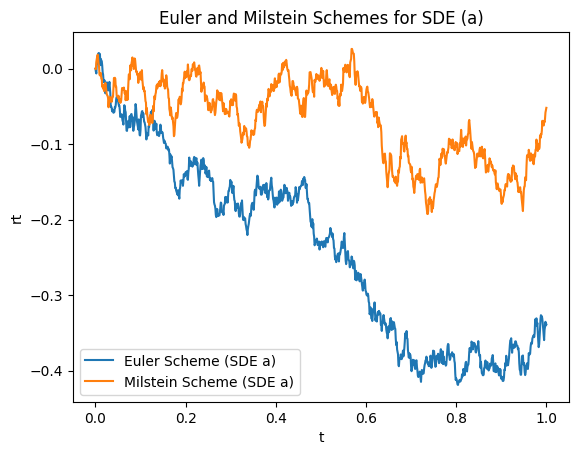

In [73]:
#plotting SDE_a
plt.plot(t, euler_scheme_sde_b(mu, T, N, sigma), label='Euler Scheme (SDE a)')
plt.plot(t, milstein_scheme_sde_b(mu, T, N, sigma), label='Milstein Scheme (SDE a)')
plt.xlabel('t')
plt.ylabel('rt')
plt.title('Euler and Milstein Schemes for SDE (a)')
plt.legend()
plt.show()



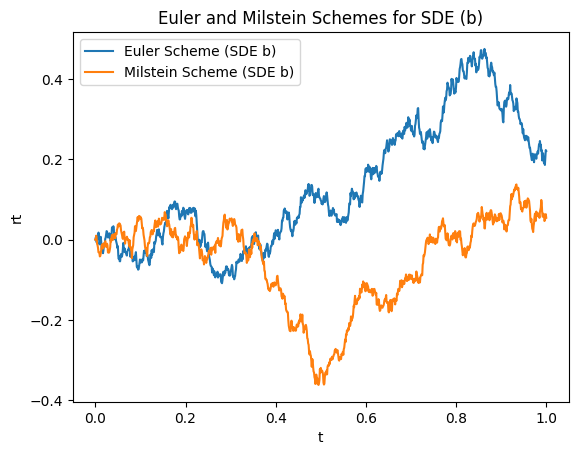

In [84]:
#plotting SDE_b
plt.plot(t, euler_scheme_sde_b(mu, T, N, sigma), label='Euler Scheme (SDE b)')
plt.plot(t, milstein_scheme_sde_b(mu, T, N, sigma), label='Milstein Scheme (SDE b)')
plt.xlabel('t')
plt.ylabel('rt')
plt.title('Euler and Milstein Schemes for SDE (b)')
plt.legend()
plt.show()



In [75]:
#QUESTION 2
# Defining the Parameters
v0 = 0.1
k = 0.5
v_hat = 0.1
sigma = 0.1
T = 1
N = 10000

# Cox-Ingersoll-Ross (CIR) model using Euler scheme
def euler_scheme_cir(v0, k, v_hat, sigma, T, N ):
    dt = T / N
    t = np.linspace(0, T, N+1)
    vt = np.zeros(N+1)
    vt[0] = v0

    dWt = np.random.normal(0, np.sqrt(dt), N)
    for i in range(N):
        vt[i+1] = vt[i] + k * (v_hat - vt[i]) * dt + sigma * np.sqrt(vt[i]) * dWt[i]
    return vt

<ipython-input-76-f20c221f7ae7>:6: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  kde_cir = kde.gaussian_kde(paths_cir)


Text(0.5, 1.0, 'Probability Density Function')

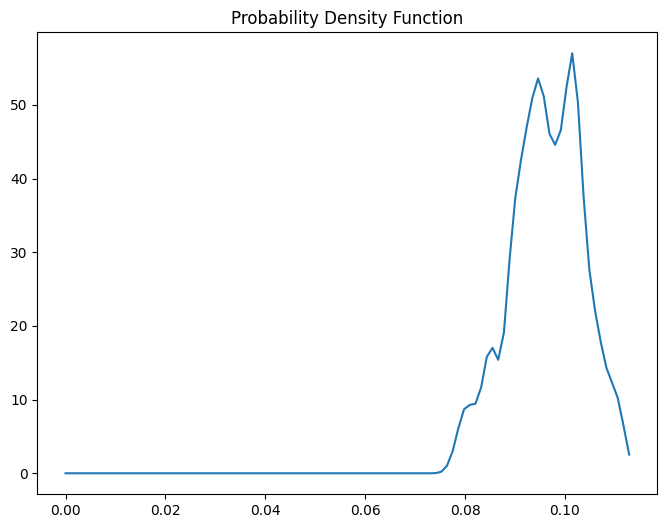

In [76]:
# Generating paths using Euler scheme
paths_cir = euler_scheme_cir(v0, k, v_hat, sigma, T, N)

# Plotting the PDF using kernel density estimation (KDE)
plt.figure(figsize=(8, 6))
kde_cir = kde.gaussian_kde(paths_cir)
x = np.linspace(0, np.max(paths_cir), 100)
plt.plot(x, kde_cir(x), label='CIR Model')
plt.title('Probability Density Function')

In [77]:
#How the PDF changes when using Vasicek model
# Generating paths using Vasicek model
def vasicek_model(v0, k, v_hat, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)
    vt = np.zeros(N+1)
    vt[0] = v0

    dWt = np.random.normal(0, np.sqrt(dt), N)
    for i in range(N):
        vt[i+1] = vt[i] + k * (v_hat - vt[i]) * dt + sigma * dWt[i]

    return vt

<ipython-input-78-7f001203d269>:4: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  kde_vasicek = kde.gaussian_kde(paths_vasicek)


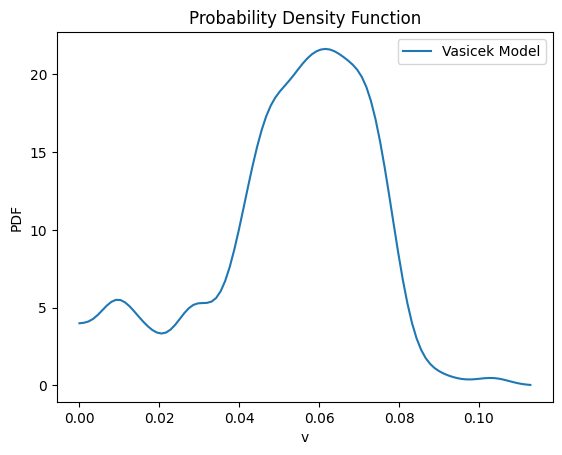

In [78]:
paths_vasicek = vasicek_model(v0, k, v_hat, sigma, T, N)

# Plotting the PDF using kernel density estimation (KDE)
kde_vasicek = kde.gaussian_kde(paths_vasicek)
plt.plot(x, kde_vasicek(x), label='Vasicek Model')
plt.xlabel('v')
plt.ylabel('PDF')
plt.title('Probability Density Function')
plt.legend()
plt.show()

In [79]:
#QUESTION 3
def heston_euler(r, v0, kappa, theta, sigma, rho, T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)
    St = np.zeros(N+1)
    vt = np.zeros(N+1)

    St[0] = 1  # Initial stock price
    vt[0] = v0  # Initial variance

    dWt1 = np.random.normal(0, np.sqrt(dt), N)
    dWt2 = rho * dWt1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt), N)

    for i in range(N):
        St[i+1] = St[i] * (1 + r * dt + np.sqrt(vt[i]) * dWt1[i])
        vt[i+1] = vt[i] + kappa * (theta - vt[i]) * dt + sigma * np.sqrt(vt[i]) * dWt2[i]

    return St, vt

In [80]:
def heston_milstein(r, v0, kappa, theta, sigma, rho, T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)
    St = np.zeros(N+1)
    vt = np.zeros(N+1)
    St[0] = 1  # Initial stock price
    vt[0] = v0  # Initial variance

    dWt1 = np.random.normal(0, np.sqrt(dt), N)
    dWt2 = rho * dWt1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt), N)

    for i in range(N):
        St[i+1] = St[i] * (1 + r * dt + np.sqrt(vt[i]) * dWt1[i])
        vt[i+1] = vt[i] + kappa * (theta - vt[i]) * dt + sigma * np.sqrt(vt[i]) * dWt2[i] + \
                  0.5 * sigma**2 * dt * (dWt2[i]**2 - 1)

    return St, vt

In [81]:
# Parameters
r = 0.05
v0 = 0.04
kappa = 3
theta = 0.04
sigma = 0.3
rho = -0.8
T = 1
N = 1000

# Generating paths using Euler scheme
St_euler, vt_euler = heston_euler(r, v0, kappa, theta, sigma, rho, T, N)

# Generating paths using Milstein scheme
St_milstein, vt_milstein = heston_milstein(r, v0, kappa, theta, sigma, rho, T, N)


In [82]:
# Generating paths using Euler scheme
St_euler, vt_euler = heston_euler(r, v0, kappa, theta, sigma, rho, T, N)


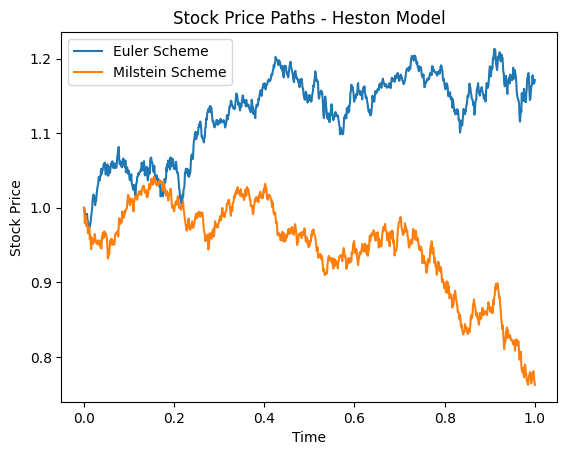

In [83]:
# Plotting the stock price paths
plt.plot(np.linspace(0, T, N+1), St_euler, label='Euler Scheme')
plt.plot(np.linspace(0, T, N+1), St_milstein, label='Milstein Scheme')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Paths - Heston Model')
plt.legend()
plt.show()